<a href="https://colab.research.google.com/github/yassine-cherni/NLP/blob/main/RNN_LSTM_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install librosa
!pip install librosa resampy

In [3]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [5]:
# Define a fixed length for MFCCs
max_length = 100  # Adjust this value as needed

# Function to extract MFCC features from audio files and pad or truncate them to a fixed length
def extract_features(file_name, max_length=max_length):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

    # Pad or truncate the features to the fixed length
    if mfccs.shape[1] < max_length:
        # Pad the features with zeros
        mfccs_padded = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
        return mfccs_padded
    else:
        # Truncate the features
        return mfccs[:, :max_length]

# Initialize lists to store extracted features and labels
features_list = []
labels_list = []

# Iterate through each directory (class label)
for class_label in os.listdir(audio_dataset_path):
    # Construct the path to the current class label directory
    class_dir_path = os.path.join(audio_dataset_path, class_label)

    # Check if the current item in the directory is a directory itself
    if os.path.isdir(class_dir_path):
        # Iterate through each audio file in the class label directory
        for audio_file in os.listdir(class_dir_path):
            # Construct the file path
            file_name = os.path.join(class_dir_path, audio_file)
            # Extract features from the audio file and pad or truncate them
            features = extract_features(file_name)

            # Append the extracted features and label to the lists
            features_list.append(features)
            labels_list.append(class_label)

# Convert lists to NumPy arrays
X = np.array(features_list)
y = np.array(labels_list)


In [6]:
# Reshape features for LSTM input (add time dimension)
X = np.expand_dims(X, axis=3)

# Convert class labels to one-hot encoded format
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the RNN-LSTM model
model = Sequential([
    LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
201/201 [==============================] - 17s 72ms/step - loss: 1.6680 - accuracy: 0.3480 - val_loss: 1.0312 - val_accuracy: 0.6201
Epoch 2/20
201/201 [==============================] - 14s 68ms/step - loss: 1.0353 - accuracy: 0.5693 - val_loss: 0.6876 - val_accuracy: 0.7405
Epoch 3/20
201/201 [==============================] - 13s 66ms/step - loss: 0.7708 - accuracy: 0.6729 - val_loss: 0.5351 - val_accuracy: 0.8029
Epoch 4/20
201/201 [==============================] - 13s 65ms/step - loss: 0.6340 - accuracy: 0.7358 - val_loss: 0.4646 - val_accuracy: 0.8153
Epoch 5/20
201/201 [==============================] - 13s 65ms/step - loss: 0.5437 - accuracy: 0.7794 - val_loss: 0.4051 - val_accuracy: 0.8478
Epoch 6/20
201/201 [==============================] - 13s 65ms/step - loss: 0.4599 - accuracy: 0.8195 - val_loss: 0.3743 - val_accuracy: 0.8634
Epoch 7/20
201/201 [==============================] - 13s 66ms/step - loss: 0.4330 - accuracy: 0.8323 - val_loss: 0.3624 - val_accuracy:

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

51/51 [==============================] - 1s 20ms/step - loss: 0.1910 - accuracy: 0.9314
Test Loss: 0.19103913009166718
Test Accuracy: 0.9313786625862122


In [11]:
# Save the model
model.save('/content/drive/MyDrive/DATA/RNN_LSTM_model.h5')

**RNN-LSTM r THE BEST 🤖#GOKU #YC1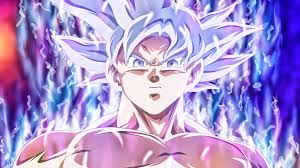**